## Задание 2 

**Студент:**  Заколпина Анастасия Николаевна  
**Группа:**  М01-504а  
**Преподаватель:**  Дьяченко Роман Александрович
**Дата выполнения:**  9 ноября 2025 г.

**Цель работы:**  Изучить методы визуализации облаков точек с цветовой информацией спомощью Matplotlib и Plotly в языке Python, научиться использовать координаты и другие параметры точек для задания цвета, а также сравнить 2D и 3D визуализацию.

In [1]:
!pip install numpy matplotlib plotly -q


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np

N = 1000
np.random.seed(42)  

points = np.random.rand(N, 3) 

colors = points.copy()  

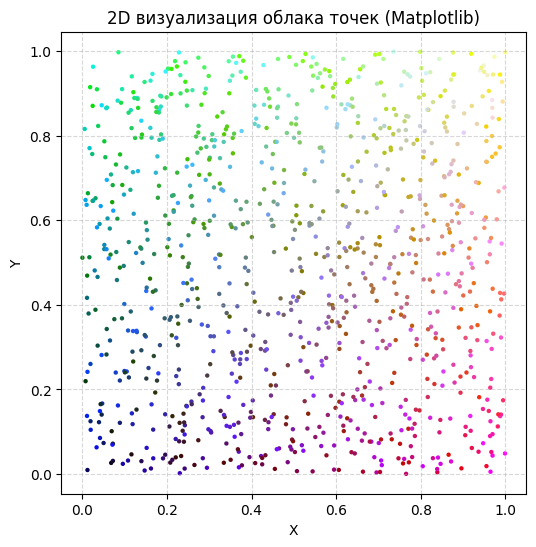

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(
    points[:, 0],  # X
    points[:, 1],  # Y
    c=colors,      # RGB цвета
    s=10,          # размер точек
    edgecolors='none'  
)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D визуализация облака точек (Matplotlib)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.axis('equal')  
plt.show()

In [11]:
import plotly.graph_objects as go

rgb_colors = [
    f'rgb({int(r*255)},{int(g*255)},{int(b*255)})'
    for r, g, b in colors
]

fig = go.Figure(data=go.Scatter3d(
    x=points[:, 0],
    y=points[:, 1],
    z=points[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=rgb_colors,
        opacity=0.8
    )
))

fig.update_layout(
    title="3D визуализация облака точек (Plotly)",
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='cube'  
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()

In [12]:
center = np.array([0.5, 0.5, 0.5])

# Евклидово расстояние до центра для каждой точки
dist = np.linalg.norm(points - center, axis=1)

dist_norm = (dist - dist.min()) / (dist.max() - dist.min())

cmap = plt.cm.viridis
colors_alt = cmap(dist_norm)[:, :3]  

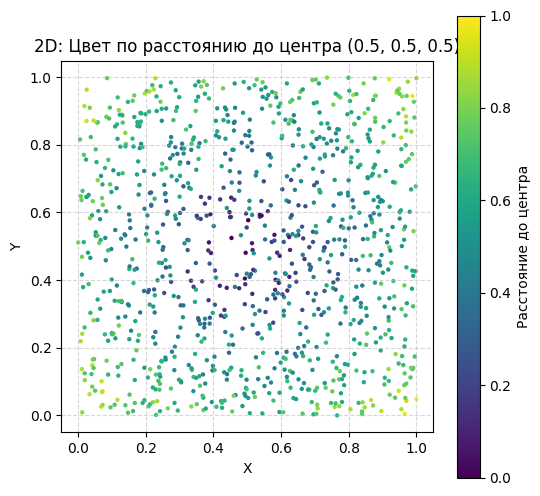

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(
    points[:, 0],                 # X
    points[:, 1],                 # Y
    c=dist_norm,                
    cmap='viridis',              # ← colormap
    s=10,
    edgecolors='none'
)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("2D: Цвет по расстоянию до центра (0.5, 0.5, 0.5)")
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_aspect('equal')

fig.colorbar(scatter, ax=ax, label='Расстояние до центра')

plt.show()

In [14]:
rgb_colors_alt = [
    f'rgb({int(r*255)},{int(g*255)},{int(b*255)})'
    for r, g, b in colors_alt
]

fig_alt = go.Figure(data=go.Scatter3d(
    x=points[:, 0],
    y=points[:, 1],
    z=points[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=rgb_colors_alt,
        opacity=0.8
    )
))

fig_alt.update_layout(
    title="3D: Цвет по расстоянию до центра (0.5, 0.5, 0.5)",
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='cube'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig_alt.show()

## Ответы на вопросы:

#### 1. Что такое облако точек и какие данные оно обычно содержит?
**Облако точек** — это набор точек в трёхмерном пространстве, каждая из которых имеет координаты (x, y, z). Обычно содержит:
- **Координаты** (обязательно) — x, y, z
- **Цвет** — часто в формате RGB или RGBA
- **Нормали** — векторы, указывающие направление поверхности
- **Интенсивность** — значение отражённого сигнала (например, в лидаре)
- **Классификация** — метки объектов (земля, здание, растительность и т.д.)

#### 2. Как представляется цвет в модели RGB?
Цвет в модели **RGB** представляется тремя компонентами:
- **R** (Red) — интенсивность красного канала
- **G** (Green) — интенсивность зелёного канала  
- **B** (Blue) — интенсивность синего канала

Каждый компонент обычно задаётся числом:
- От 0 до 255 (целочисленное представление)
- От 0.0 до 1.0 (нормализованное представление)

#### 3. В каком диапазоне должны находиться значения RGB для визуализации?
Для корректной визуализации значения должны находиться:
- **Matplotlib**: от 0.0 до 1.0 (float) или от 0 до 255 (int)
- **NumPy/PIL**: обычно от 0 до 255 (uint8)
- **Plotly**: от 0 до 255 в строковом формате 'rgb(R,G,B)'

#### 4. Что такое нормализация значений и зачем она нужна при работе с цветами?
**Нормализация** — приведение значений к определённому диапазону (обычно 0-1). Нужна для:
- Совместимости с библиотеками визуализации
- Корректного отображения цветовых карт (colormaps)
- Сравнения данных разных масштабов
- Устранения влияния выбросов на цветовое кодирование

#### 5. Чем отличается абсолютный цвет от вычисляемого?
- **Абсолютный цвет**: задаётся напрямую (например, RGB значениями)
- **Вычисляемый цвет**: получается преобразованием других данных:
  - Из координат точки
  - Из расстояния до центра/объекта
  - Из дополнительных атрибутов (температура, высота и т.д.)

### Работа с NumPy и цветами

#### 6. Как с помощью NumPy задать цвет каждой точке на основе её координаты?
```python
import numpy as np

# Пример: цвет зависит от координаты Z (высоты)
points = np.random.rand(100, 3) * 100  # случайные точки
colors = np.zeros((100, 3))

# Нормализуем Z координату для цвета
z_normalized = (points[:, 2] - points[:, 2].min()) / (points[:, 2].max() - points[:, 2].min())
colors[:, 0] = z_normalized  # красный канал зависит от высоты
colors[:, 1] = 0.5           # зелёный постоянный
colors[:, 2] = 1 - z_normalized  # синий обратно зависит от высоты
```
#### 7. Как вычислить расстояние от точки до центра пространства?
```python
import numpy as np

points = np.random.rand(100, 3) * 100
center = np.array([50, 50, 50])  # центр пространства

# Расстояние от каждой точки до центра
distances = np.linalg.norm(points - center, axis=1)
```
#### 8. Как задать градиент цвета по оси X, Y или Z?
```python
import numpy as np

# Градиент по оси X
points = np.random.rand(100, 3) * 100
colors = np.zeros((100, 3))

# Нормализуем X координату
x_normalized = (points[:, 0] - points[:, 0].min()) / (points[:, 0].max() - points[:, 0].min())

# Градиент от синего к красному
colors[:, 0] = x_normalized  # красный увеличивается с X
colors[:, 2] = 1 - x_normalized  # синий уменьшается с X
```
#### 9. Как преобразовать массив float значений в нормализованный массив для colormap?
```python
import numpy as np
from matplotlib import cm

values = np.random.randn(100) * 10  # произвольные значения

# 1. Нормализация к диапазону 0-1
normalized = (values - values.min()) / (values.max() - values.min())

# 2. Использование Normalize из matplotlib
from matplotlib.colors import Normalize
norm = Normalize(vmin=values.min(), vmax=values.max())
normalized = norm(values)

# 3. Применение colormap
colormap = cm.viridis
colors = colormap(normalized)
```
#### 10. Как используется параметр c= в функции plt.scatter() ?
Параметр c= определяет цвет точек
**Один цвет:** c='red' или c='#FF0000'
**Массив значений:** цвета из colormap
**RGB массив:** массив формы (N, 3) или (N, 4)

```python
import matplotlib.pyplot as plt

# Разные варианты:
plt.scatter(x, y, c='blue')  # все точки синие
plt.scatter(x, y, c=z_values)  # цвет зависит от z_values через colormap
plt.scatter(x, y, c=rgb_array)  # прямое задание RGB
```
#### 11. Что такое colormap в Matplotlib и как его применить к облаку точек?
**Colormap** — цветовая карта, преобразующая числовые значения в цвета.

```python
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Создание облака точек
points = np.random.rand(100, 3)
scatter = ax.scatter(points[:, 0], points[:, 1], points[:, 2], 
                     c=points[:, 2],  # цвет по высоте (Z)
                     cmap='viridis',   # цветовая карта
                     s=50)
plt.colorbar(scatter)  # добавление цветовой шкалы
plt.show()
```
#### 12. Какие бывают цветовые карты (colormaps ) и как выбрать подходящую?
**Типы colormaps:**
- Последовательные (Sequential): viridis, plasma, inferno, magma, cividis
- Дивергентные (Diverging): RdBu, PiYG, BrBG — для данных с критической серединой
- Циклические (Cyclic): twilight, hsv — для периодических данных
- Категориальные (Qualitative): tab10, Set3 — для дискретных категорий

**Выбор зависит от:**
- Типа данных (непрерывные, категориальные, дивергентные)
- Условий восприятия (цветовая слепота, печать)
- Контекста (тепло-холодные ассоциации)

#### 13. Как отобразить цветовую шкалу (legend) на графике?
```python
import matplotlib.pyplot as plt

scatter = plt.scatter(x, y, c=values, cmap='viridis')
cbar = plt.colorbar(scatter)
cbar.set_label('Высота (м)', rotation=270, labelpad=15)  # подпись
cbar.set_ticks([0, 0.5, 1])  # метки на шкале
cbar.set_ticklabels(['Низ', 'Средне', 'Верх'])  # текстовые метки
```
#### 14. Как создаётся 3D-график с помощью plotly.graph_objects ?
```python
import plotly.graph_objects as go
import numpy as np

# Создание данных
points = np.random.rand(100, 3)

# Создание графика
fig = go.Figure(data=[go.Scatter3d(
    x=points[:, 0],
    y=points[:, 1],
    z=points[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=points[:, 2],  # цвет по высоте
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(title='3D облако точек')
fig.show()
```
#### 15. Как задать цвет каждой точки вручную в формате 'rgb(R,G,B)' в Plotly?
```python
import plotly.graph_objects as go
import numpy as np

# Генерация RGB цветов
n_points = 100
colors = []
for i in range(n_points):
    r = int(255 * i / n_points)
    g = 100
    b = int(255 * (1 - i / n_points))
    colors.append(f'rgb({r},{g},{b})')

fig = go.Figure(data=[go.Scatter3d(
    x=np.random.randn(100),
    y=np.random.randn(100),
    z=np.random.randn(100),
    mode='markers',
    marker=dict(
        size=5,
        color=colors  # список строк RGB
    )
)])
```
#### 16. В чём преимущества интерактивной визуализации по сравнению со статичной?
**Вращение и масштабирование** — изучение с разных ракурсов
**Выделение и информация о точках** — hover-подсказки
**Анимация и переходы** — динамическое представление
**Экспорт и сохранение** — возможность сохранить конкретный вид
**Интерактивные элементы управления** — фильтры, слайдеры

#### 17. Какие параметры можно задать в Plotly для изменения внешнего вида маркеров?
```python
marker=dict(
    size=10,                    # размер
    color=z_values,             # цвет (значения или массив)
    colorscale='Viridis',       # цветовая карта
    opacity=0.8,                # прозрачность
    symbol='circle',            # форма маркера
    line=dict(                  # обводка
        color='black',
        width=1
    ),
    colorbar=dict(              # настройка цветовой шкалы
        title="Высота",
        thickness=20
    ),
    cmin=0, cmax=100            # диапазон для colormap
)
```
#### 18. Как можно сохранить облако точек с цветами в файл (например, .ply , .csv)?
```python
import open3d as o3d
import numpy as np

# Создание PointCloud
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(colors)

# Сохранение
o3d.io.write_point_cloud("cloud.ply", pcd)
```
#### 19. Как можно использовать цвет как способ отображения дополнительных данных (температура, интенсивность, категория и т.д.)?
Цвет может кодировать:
**Физические параметры:** температура (тепло-холодно), давление, влажность
**Геометрические свойства:** высота, кривизна, ориентация
**Классификацию:** тип объекта (земля, здание, растительность)
**Временные изменения:** возраст данных, время сканирования
**Статистические показатели:** плотность точек, уверенность измерений

#### 20. Что произойдёт, если задать некорректные значения RGB (например, больше 1.0 или отрицательные)?
**Зависит от библиотеки:**
**Matplotlib:** значения обрезаются до диапазона [0, 1]
**Plotly:** могут появиться артефакты или ошибки
**Open3D:** обычно обрезание или непредсказуемое поведение
**Последствия:**
- Искажение цветов
- Потеря информации
- Возможные ошибки визуализации
Рекомендация: всегда нормализовать значения перед использованием

#### 21. Как можно применить цветовую визуализацию при анализе: Ландшафта,Сканов зданий, 3D-моделей, Научных данных (например, температуры или давления)?
**Ландшафта:** высота (градиент), тип поверхности, уклон
**Сканов зданий:** материал конструкций, состояние, температурный режим
**3D-моделей:** ошибки реконструкции, плотность точек, текстуры
**Научных данных:** распределение температуры/давления, концентрация веществ
#### 22. Как можно визуализировать разные классы точек (например, "земля", "растительность", "здания") с помощью цветов? 
```python
# Создание цветовой схемы для классов
class_colors = {
    0: [0.2, 0.8, 0.2],  # растительность - зелёный
    1: [0.8, 0.2, 0.2],  # здания - красный
    2: [0.6, 0.4, 0.1],  # земля - коричневый
    3: [0.2, 0.2, 0.8]   # вода - синий
}

# Применение цветов к точкам
colors = np.array([class_colors[cls] for cls in point_classes])
```
#### 23. Что лучше выбрать для презентации результатов: Matplotlib или Plotly? Почему?
**Matplotlib** лучше для:
- Статических изображений в публикациях
- Скриптовой обработки и автоматизации
- Простых и быстрых визуализаций

**Plotly** лучше для:
- Интерактивных демонстраций и презентаций
- Веб-приложений и дашбордов
- Исследовательского анализа с необходимостью вращения
- Совместной работы и обмена интерактивными графиками